In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 그래프 축에서 음수 부호를 쓸 수 있게 구성
mpl.rc('axes', unicode_minus=False)
plt.rc('axes', unicode_minus=False)
plt.rc('font',family='Malgun Gothic')

### 1. 아이리스를 이용해서 모형을 살펴보자

<img src="./img/아이리스.png" width="1000" height="500">

명목형: 순서 등급 구별하지 않고 단순 개별 항목을 뜻한다.   
    ex) 성별, 혈액형, 차량번호판 등  
 ㄴ> 빈도수 분석, 교차 분석  
 ㄴ> 원핫인코딩(머신러닝)  
     1 0 0  
     0 1 0  
     0 0 1  

### 아이리스로 선형회귀, 분류, 클러스터 중 뭘 할 수 있어?

- 1. 선형회귀 : 종속변수와 하나 이상의 독립변수 간의 관계를 모델링  
    ex) 꽃받침 길이와 꽃받침 폭을 기반으로 꽃잎 길이를 예측할 수 있다.

- 2. 분류 : 여러 개의 클래스 또는 범주로 분류하는 모델링  
    ex) 꽃의 종류를 예측하는 분류 모델을 구현할 수 있다. 주어진 특성값(X)을 기반으로 세 개의 클래스 중 하나로 분류하는 모델


- 3. 클러스터 : 유사한 데이터 포인터를 그룹으로 묶는 비지도 학습  
    ex) y값 안 쓰고 주어진 특성값(X)을 기반으로(꽃 특성을 가지고) 비슷한 꽃들을 클러스터로 묶을 수 있다.

## 1. 선형회귀 
: 종속변수와 하나 이상의 독립변수 간의 관계를 모델링 ; LinearRegression  
    ex) 꽃받침 길이와 꽃받침 폭을 기반(X)으로 꽃잎 길이(y^)를 예측할 수 있다.
- 순서 : 데이터 로드 -> 모델 생성 학습 -> 예측하고 -> 결과 시각화

<img src="img/회귀핏함수매개변수.png">

#### plt.legend()
- plt.legend() 함수는 matplotlib 라이브러리를 사용하여 그린 그래프에 범례(legend)를 추가하는 데 사용됩니다. 
- 범례는 각 선이나 점이 어떤 데이터를 나타내는지를 설명하는 역할을 합니다.
- label 매개변수를 사용하여 이름을 할당하였습니다. 
- plt.legend()를 호출하면 이러한 레이블이 범례로 표시되며, 그래프 상에 위치도 자동으로 조정됩니다.
- 범례의 위치를 수동으로 조절하고 싶다면 loc 매개변수를 사용할 수 있습니다.


#### reshape() 
- 배열의 차원을 변경할 때 사용되며, -1은 해당 차원의 크기를 자동으로 계산하라는 의미입니다.
- 1차원 배열을 2차원 배열로 변경하고자 할 때 reshape(-1, 1)을 사용할 수 있습니다.

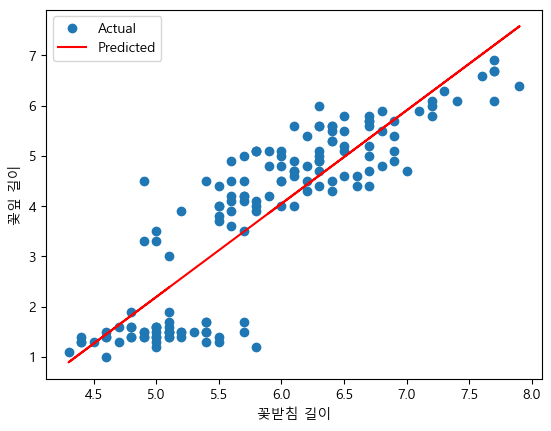

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 데이터 로드
iris= datasets.load_iris()
X= iris.data[:,0] # 모든 로우의 속성값 0번지 애들 : 꽃받침 길이 특성  -> X가 1개 = 단순선형회귀
y= iris.data[:,2] # 모든 로우의 속성값 2번지 애들 : 꽃잎 길이 특성

# 선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X.reshape(-1,1),y) # X를 2차원으로 만들어 줘야 한다.

# 모델 예측
y_pred = model.predict(X.reshape(-1,1))
# reshape() 메서드는 배열의 차원을 변경할 때 사용되며, -1은 해당 차원의 크기를 자동으로 계산하라는 의미입니다.
# 1차원 배열을 2차원 배열로 변경하고자 할 때 reshape(-1, 1)을 사용할 수 있습니다.

# 결과 시각화
plt.scatter(X,y, label="Actual")
plt.plot(X,y_pred, color="red", label="Predicted")

plt.xlabel("꽃받침 길이")
plt.ylabel("꽃잎 길이")

plt.legend()
plt.show()

# 오차가 크다 = 모델의 예측 성능이 낮다.
# 예측선 = 예측값

In [3]:
X

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [4]:
X.reshape(-1,1)

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [5]:
y

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

## 2. 분류 
: 여러 개의 클래스 또는 범주로 분류하는 모델링  
    ex) 꽃의 종류를 예측하는 분류 모델을 구현할 수 있다. 주어진 특성값(X)을 기반으로 세 개의 클래스 중 하나로 분류하는 모델
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
<img src="img/분류메소드.png">

- sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

- neighbors : https://scikit-learn.org/stable/modules/neighbors.html#classification
- https://docs.opencv.org/4.9.0/d5/d26/tutorial_py_knn_understanding.html

In [6]:
dir(datasets.data)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [2]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 데이터 로드, 특성, 타켓클래스
iris= datasets.load_iris()
X= iris.data
y= iris.target
iris
# # 데이터 분할 test_size=0.2
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 모델 학습 및 실행  KNeighborsClassifier (n_neighbors = 3)
# knn_model = KNeighborsClassifier(n_neighbors=3)
# knn_model.fit(X_train, y_train)

# # 예측
# y_pred = knn_model.predict(X_test)

# # 정확도 평가 accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## 3. 클러스터 
: 유사한 데이터 포인터를 그룹으로 묶는 비지도 학습  
    ex) y값 안 쓰고 주어진 특성값(X)을 기반으로(꽃 특성을 가지고) 비슷한 꽃들을 클러스터로 묶을 수 있다.
- class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
- k-means 논문 : https://dl.acm.org/doi/10.1145/1137856.1137880
- MiniBatchKMeans
- Alternative online implementation that does incremental updates of the centers positions using mini-batches. For large scale learning (say n_samples > 10k) MiniBatchKMeans is probably much faster than the default batch implementation.= 데이터 크기가 10k 이상이면 그냥 K-Means가 아니라 MiniBatchKMeans를 사용하라는 말이다.
<img src="img/Kmeans.png">

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


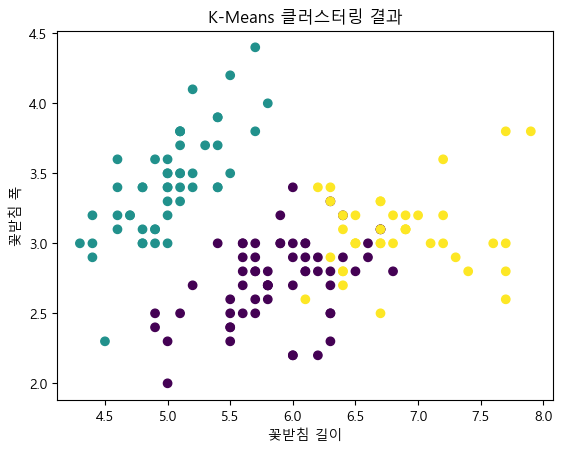

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [8]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 데이터 로드, 특성
iris= datasets.load_iris()
X= iris.data

# K-Means 클러스터링 모델 생성 및 학습
kmeans_model = KMeans(n_clusters=3, random_state=0, n_init="auto")
# Changed in version 1.4: Default value for n_init changed to 'auto'.
# 스래드? 개수를 적는 곳이다.
kmeans_model.fit(X)

# 각 데이터 포인트에 대한 클러스터 할당 확인
labels = kmeans_model.labels_
# print("Cluster labels:", labels)

# 각 클러스터의 중심 좌표 확인
# centers = kmeans_model.cluster_centers_
# print("Cluster centers:", centers)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("K-Means 클러스터링 결과")
plt.show()

labels

<img src="img/와인속성.png">

### wine 데이터 설명
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

classes= y
dimensionality = X
전체 샘플 수 = 178
y를 0 1 2 나 나누면
0 은 59개 1은 71개 2는 48개

### SVC
- SVC는 Support Vector Classification(서포트 벡터 분류)를 수행하는 머신러닝 모델을 의미합니다. SVC는 사이킷런(scikit-learn) 라이브러리에서 제공되는 SVM(Support Vector Machine)의 분류 모델 중 하나입니다. SVM은 주로 분류 및 회귀 분석을 위한 강력한 머신러닝 알고리즘 중 하나로 알려져 있습니다
- SVM은 데이터를 고차원 공간에 매핑하여 클래스를 분리하는 초평면(hyperplane)을 찾습니다. SVC는 이러한 SVM을 사용하여 데이터를 분류하는데, 특히 이진 분류(binary classification) 및 다중 클래스 분류(multiclass classification)에 사용됩니다
- SVC는 다양한 종류의 데이터셋에서 효과적으로 사용될 수 있으며, 특히 고차원의 데이터셋이나 비선형 분류 문제에 적합합니다

### 아이리스 데이터 셋을 활용해서 교차 검증을 한 후 최선의 모델을 선택하자.

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [10]:
iris=datasets.load_iris()
X, y= iris.data, iris.target

In [11]:
# 여러개의 모델을 생성
models={
    "LogisticRegression": LogisticRegression(max_iter=200),
    "SVC": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier()
}

In [12]:
# 교차 검증 모델 성능 평가 cross_val_score
for name, model in models.items(): # 키 밸류로 가지고 옴
    score=cross_val_score(model,X,y,cv=5)
    print(f"{name}: 평균 정확도 = {score.mean():.3f}, 표준편차 = {score.std():.3f}")

LogisticRegression: 평균 정확도 = 0.973, 표준편차 = 0.025
SVC: 평균 정확도 = 0.967, 표준편차 = 0.021
RandomForestClassifier: 평균 정확도 = 0.953, 표준편차 = 0.034
KNeighborsClassifier: 평균 정확도 = 0.973, 표준편차 = 0.025


In [13]:
# 교차 검증 모델 성능 평가 후 판다스로 리턴해서 순위를 보자.

In [14]:
# 여러개의 모델을 생성
models=[
    ("LogisticRegression", LogisticRegression(max_iter=200)),
    ("SVC", SVC()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("KNeighborsClassifier", KNeighborsClassifier())
]

In [15]:
## 쌤 꺼
results=[] 
for name, model in models: # 리스트 객체로 가지고 옴
    clf = model
    if hasattr(clf, 'score'):
        scores = cross_val_score(clf, X, y, cv=5)
        results.append({
            "model": name,
            "mean accuracy": scores.mean(),
            "std": scores.std()
        })
results

[{'model': 'LogisticRegression',
  'mean accuracy': 0.9733333333333334,
  'std': 0.02494438257849294},
 {'model': 'SVC',
  'mean accuracy': 0.9666666666666666,
  'std': 0.02108185106778919},
 {'model': 'RandomForestClassifier',
  'mean accuracy': 0.9666666666666668,
  'std': 0.02108185106778919},
 {'model': 'KNeighborsClassifier',
  'mean accuracy': 0.9733333333333334,
  'std': 0.02494438257849294}]

In [16]:
import pandas as pd

results_df=pd.DataFrame(results)

In [17]:
top_2_model=results_df.sort_values(by="mean accuracy", ascending=False).head(2)
top_2_model

,model,mean accuracy,std
0,LogisticRegression,0.973333,0.024944
3,KNeighborsClassifier,0.973333,0.024944


<< 정규화, 표준화 >> PDF P.37, 38

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

iris=load_iris()

print(iris.keys()) # 데이터 셋 키 값
print(iris.DESCR)  # 설명, 속성

# 데이터 프레임 생성하고 데이터셋, 특성 열로 할당
df=pd.DataFrame(iris.data, columns=iris.feature_names)

# 타겟을 데이터 프레임에 추가
df['target']=pd.Series(iris.target) # target
display(df.head(10))

# display : 주피터 노트북에 뿌려주라 = print랑 비슷
display(df.mean()) #평균
display(df.std())  # 표준편차
display(df.var())  # 분산

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
target               0.671141
dtype: float64

In [19]:
# 표준화
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()  # 표준화 생성
std_scaler.fit(df)    # 데이터 프레임에 표준화를 적용(실행)

std_values=std_scaler.transform(df)  # 표준화 적용된 결과를 리턴받기 위해 데이터 프레임을 변환시킨다.

# 표준화된 값을 가진 새로운 데이터 프레임을 생성한다.
df1=pd.DataFrame(std_values, columns=df.columns)
display(df1.head(10))

display(df1.mean()) # 평균
display(df1.std())  # 표준편차
display(df1.var())  # 분산

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745
5,-0.537178,1.939791,-1.169714,-1.052180,-1.224745
6,-1.506521,0.788808,-1.340227,-1.183812,-1.224745
7,-1.021849,0.788808,-1.283389,-1.315444,-1.224745
8,-1.748856,-0.362176,-1.340227,-1.315444,-1.224745
9,-1.143017,0.098217,-1.283389,-1.447076,-1.224745


sepal length (cm)   -4.736952e-16
sepal width (cm)    -7.815970e-16
petal length (cm)   -4.263256e-16
petal width (cm)    -4.736952e-16
target              -1.421085e-16
dtype: float64

sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
target               1.00335
dtype: float64

sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
target               1.006711
dtype: float64

In [20]:
# 정규화 : 모든 특성값을 0과 1사이로 조정
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

mimx_scaler=MinMaxScaler()
mimx_scaler.fit(df)
mimx_values=mimx_scaler.transform(df)

# 정규화된 값을 가진 새로운 데이터 프레임 생성
df2=pd.DataFrame(mimx_values, columns=df.columns)
display(df2.head(10))

display(df2.min())  #최소값
display(df2.max())  #최대값
display(df2.mean()) # 평균

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
5,0.305556,0.791667,0.118644,0.125000,0.0
6,0.083333,0.583333,0.067797,0.083333,0.0
7,0.194444,0.583333,0.084746,0.041667,0.0
8,0.027778,0.375000,0.067797,0.041667,0.0
9,0.166667,0.458333,0.084746,0.000000,0.0


sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
target               0.0
dtype: float64

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
target               1.0
dtype: float64

sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
target               0.500000
dtype: float64

이 다음에 EDA 작업 들어가는 거다.

### pipeline
- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline
- 전처리와 모델 학습 과정을 자동화하는 작업

### compose.ColumnTransformer
- https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer
- 파이프 라인처럼 사용할 수 있다.
- 파이프라인은 열 특성이 동일하다. 아이리스는 특성 단위가 똑같은데
    서로 다른 처리를 위한 열 특성을 한꺼번에 하고 싶을 때
    특성을 다르게 할 때
    파이프 라인은 특성이 동일해서 그 중 2개 뽑아서 로지스틱이나 표준화 하자
    다른 특성을 가진 애들을 적용할 때 사용 한다.
    괄호안에 트랜스포터 구현하는 역할들을 하고 있다. 파이프라인은 steps


In [21]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest  # 가장 중요한 K개의 특성을 알아서 추출 
from sklearn.pipeline import Pipeline

iris = load_iris()
pipe = Pipeline(
                steps=[   # 튜플 형태로 없애도 디폴트로 steps 된다. 튜플들이 가지고 있는 리스트
                        ('select', SelectKBest(k=2)),  # 원본 특성이름을 리턴하는 기능이 없다.
                        ('clf', LogisticRegression())]) # 추출한 K특성들로, 데이터를 두 개의 클래스로 분류하는데 

pipe.fit(iris.data, iris.target)

pipe[:-1].get_feature_names_out() # array(['x2', 'x3'], dtype=object), get만 있고 set은 없다.
# 파이프 라인의 마지막 단계의 LogisticRegression 분류기를 제외하고 출력되는 특성이름을 리턴하자.

array(['x2', 'x3'], dtype=object)

### compose.ColumnTransformer

In [22]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

iris = load_iris()

# ColumnTransformer를 사용하여 서로 다른 처리를 각 열(특성)에 적용
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [0, 1]),  # 첫 번째와 두 번째 특성 표준화
        # ('cat', OneHotEncoder(), [2, 3])  # cat은 별칭 세 번째와 네 번째 특성 원-핫 인코딩
        # iris 데이터는 특성들이 다 연속형이라 원핫 인코딩 불가 왜냐면 범주형만 가능하기에
    ]
)

### 카이제곱 chi2 : 두 범주형 변수 사이의 독립성을 평가(통계에서 배움)
### 머신러닝에서 카이제곱을 사용하게 되면: k개의 특성을 가져다가 k개의 특성 간의 얼마나 관련성이 높은지 판단한다.
### Chi-squared stats of non-negative features for classification tasks.
### 특성(feature)들에 대한 양수값만 가져다가 카이제곱 통계량(Chi-squared stats)
### 단점: 특성 2개 넘어가면 통계적으로 높은 값이 안 나옴
### 그래서 k 기본값은 10개이지만 카이제곱을 쓸 때는 보통 k값 2개만 한다. - 가장 점수가 높음

#### 만일에 특징값이 음수일 경우 카이제곱 어떻게 구해?
#### -> 최소값을 더하거나 또는 특성값에 제곱을 한다.

### SelectKBest
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
# k 기본값 10개

### FeatureUnion
#  scikit-learn 라이브러리에서 제공하는 변환기(Transformer)들을 병렬로 합치는 역할을 하는 클래스입니다. 
# 주로 다양한 특성 추출 방법을 사용하고자 할 때, 여러 개의 변환기를 하나로 합쳐서 사용하는 데에 활용

# FeatureUnion을 사용하여 원본 특성과 SelectKBest를 통해 선택된 특성을 결합
combined_features = FeatureUnion([
    ("preprocessor", preprocessor),
    ("feat_selection", SelectKBest(score_func=chi2, k=2)) 
    # iris 데이터는 원래 양수만 있어서 오류가 안 난다.
    # => 카이제곱을 통해서 가장 관련이 있는 X값 2개를 추출
    # iris는 특성 4개(전체)의 속성 중에 가장 관련이 있는 2개의 속성을 뽑으라는 뜻
])

# 최종 파이프라인 생성
pipeline = Pipeline(steps=[
    ('features', combined_features),  # 특성 결합
    ('clf', LogisticRegression())     # 분류기
])

# 파이프라인 학습
pipeline.fit(iris.data, iris.target)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('preprocessor',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  StandardScaler(),
                                                                                  [0,
                                                                                   1])])),
                                                ('feat_selection',
                                                 SelectKBest(k=2,
                                                             score_func=<function chi2 at 0x000001DDDA0C19E0>))])),
                ('clf', LogisticRegression())])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 분할
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 파이프라인 학습 시키고
pipeline.fit(X_train, y_train)

# 테스트 데이터에 대한 정답률 계산
accuracy = pipeline.score(X_test, y_test)
print(f"정답률:{accuracy:.2f}")

# 테스트 데이터에 대한 예측값
y_pred = pipeline.predict(X_test)
print(f"예측값:{y_pred}") # 그냥하면 오류나고 원-핫 인코딩 주석처리하면 된다.
# 원핫인코드는 범주형 데이터만 가능한데 2 3 은 연속형이라 오류가 발생한다.
# 원래는 iris 파일은 원핫 인코더 할 필요가 없다. 특성들이 다 연속형이라.

정답률:1.00
예측값:[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


<< 사용자가 X값을 새로운 값으로 대입 시켜서 예측된 꽃을 판별해보자. >>

In [24]:
import numpy as np

new_data=np.array([[5.1, 3.5, 1.4, 0.2],
                   [6.1, 3.0, 5.2, 2.3],
                   [5.9, 3.0, 4.2, 1.5],
                  ])

# 파이프 라인을 사용하여 새로운 데이터의 꽃 분류 예측
new_y_pred = pipeline.predict(new_data)
print(f"예측값:{new_y_pred}")

# 아이리스 데이터 셋의 타켓 이름을 사용하여 예측된 클래스 이름을 출력
target_names=iris.target_names
predict_class_name=target_names[new_y_pred]

print(f"예측된 꽃 분류: {predict_class_name}")

예측값:[0 2 1]
예측된 꽃 분류: ['setosa' 'virginica' 'versicolor']


## get_feature_names_out 설명

In [25]:
import ssl
ssl. _create_default_https_context=ssl._create_unverified_context

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

X, y = fetch_openml(
    "titanic", version=1, as_frame=True, return_X_y=True, parser="pandas"
)
numeric_features = ["age", "fare"]
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
# 0번지 인덱스에 넣고
categorical_features = ["embarked", "pclass"]

preprocessor = ColumnTransformer(
    [
        ("num", numeric_transformer, numeric_features),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            categorical_features,
        ),
    ],
    verbose_feature_names_out=False,
)
log_reg = make_pipeline(preprocessor, SelectKBest(k=7), LogisticRegression())
# SelecKBest
# f_classif 
# ANOVA F-value between label/feature for classification tasks.
# ANOVA(통계 분산분석: 타겟변수랑 X값이 얼마나 연관관계 있는 지 보는 친구) 
# 특성이 카테고리형 타켓 변수와 얼마나 연관성이 있는지 계산
# X값이 카테고리형 범주형 이니까 y값일 수도 있고 아닐 수도 있다. X 중에서도 등급들이 X값이 얼마나 연관 있는지
# 카테고리형 타겟 변수랑 얼마나 연관이 있는 지 계산하는 친구이다. 직급 연봉 보너스 관계도 할 때 사용
# 그 중 가장 연관이 있는 애들을 가지고 온다.
# see also는 특징간에 어떤 유사도가 있는지 나타내는 친구들이다. 

log_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['embarked', 'pclass'])],
                                   verbose_feature_names_out=False)),
                ('selectkbest', SelectKBest(k=7)),
                ('logisticregression', LogisticRegression())])

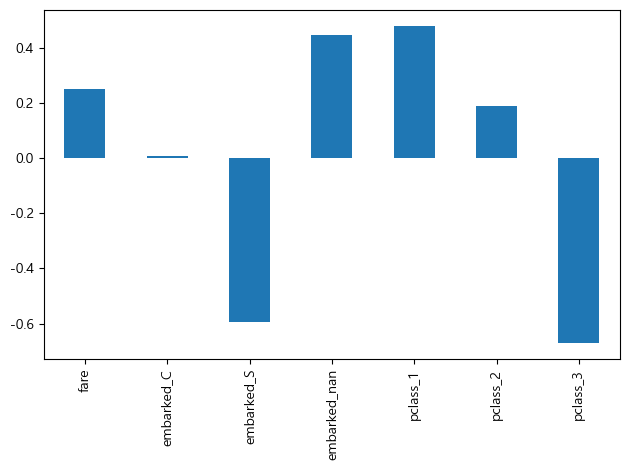

In [27]:
import pandas as pd

log_reg_input_features = log_reg[:-1].get_feature_names_out()
pd.Series(log_reg[-1].coef_.ravel(), index=log_reg_input_features).plot.bar()
plt.tight_layout()

In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

anova_filter = SelectKBest(f_classif, k=3)
clf = LinearSVC(dual="auto")
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k=3)),
                ('linearsvc', LinearSVC(dual='auto'))])

In [29]:
from sklearn.metrics import classification_report

y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

